DATASET: 

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above 

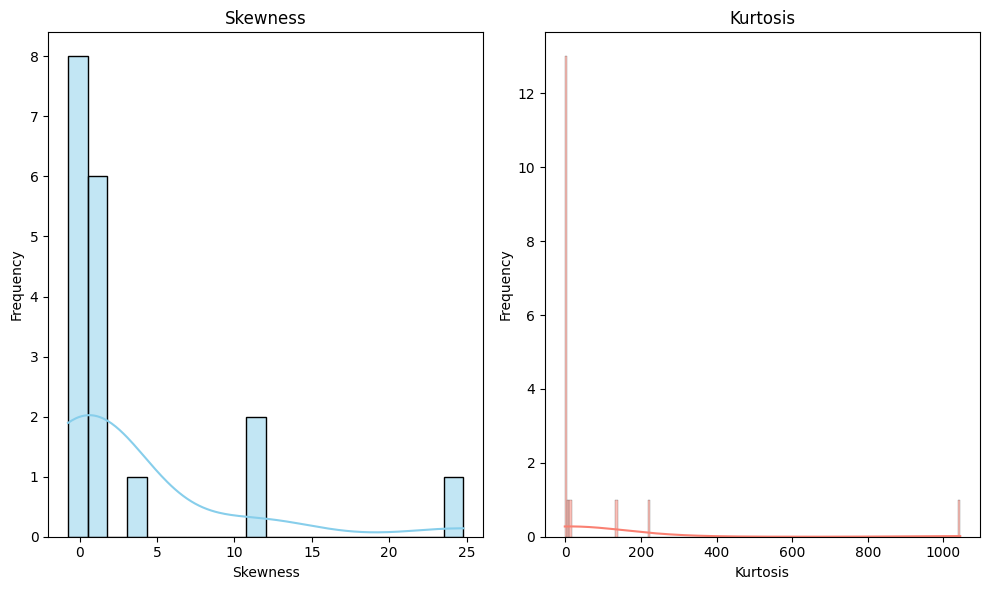

Summary Statistics:
              date         price     bedrooms    bathrooms  sqft_living  \
count  4600.000000  4.600000e+03  4600.000000  4600.000000  4600.000000   
mean     36.135217  2.740830e-01     0.400870    -0.118913     0.137368   
std      19.708177  1.697850e+00     0.908848     1.045041     0.830351   
min       0.000000 -1.388018e+00    -3.000000    -3.000000    -1.387931   
25%      19.000000 -4.157593e-01     0.000000    -0.666667    -0.448276   
50%      38.000000 -8.763064e-17     0.000000     0.000000     0.000000   
75%      53.000000  5.842407e-01     1.000000     0.333333     0.551724   
max      69.000000  7.868124e+01     6.000000     7.666667     9.965517   

          sqft_lot       floors   waterfront         view    condition  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.194820     0.012065     0.007174     0.240652     0.451739   
std       5.980241     0.538288     0.084404     0.778405     0.677230   
min     

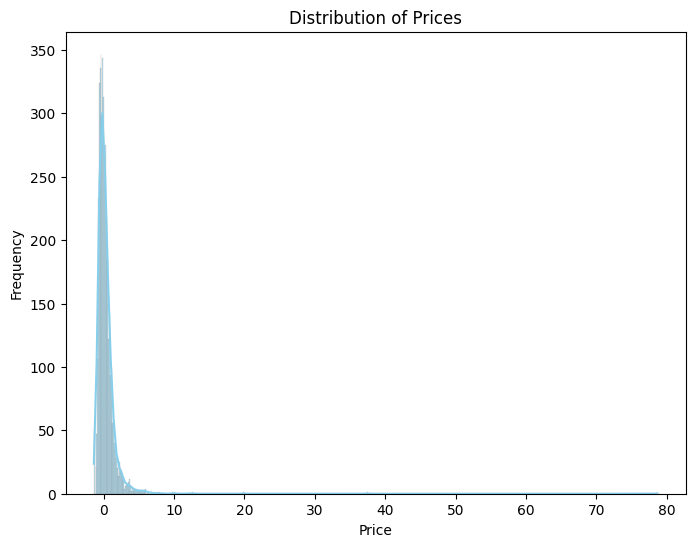

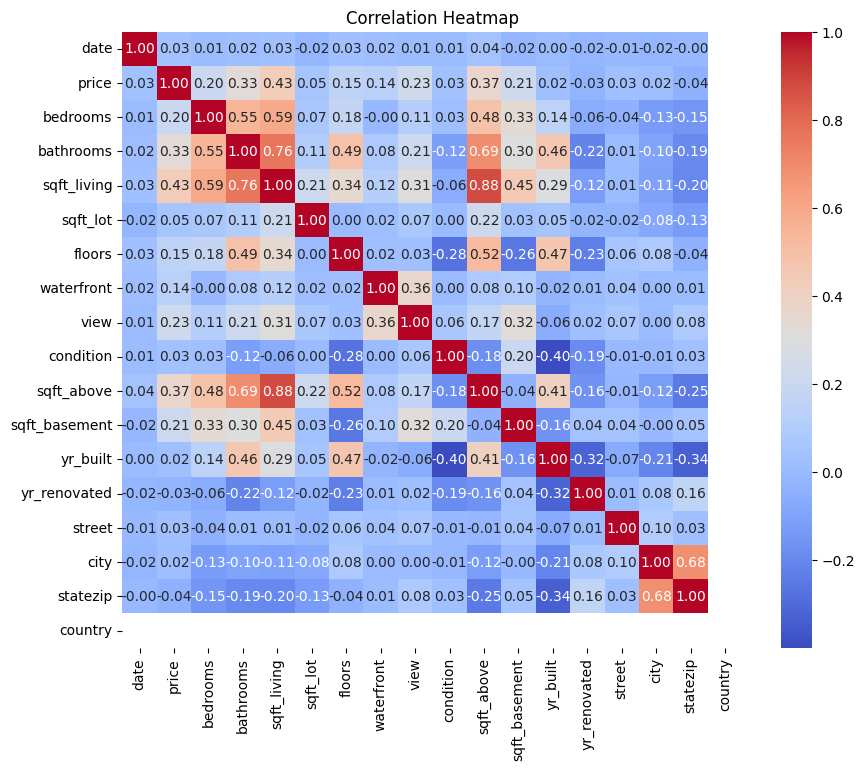

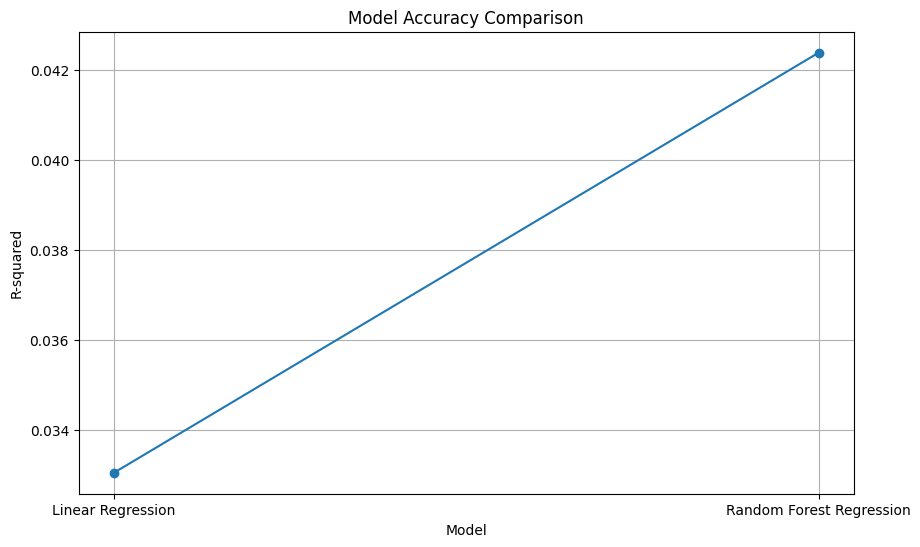

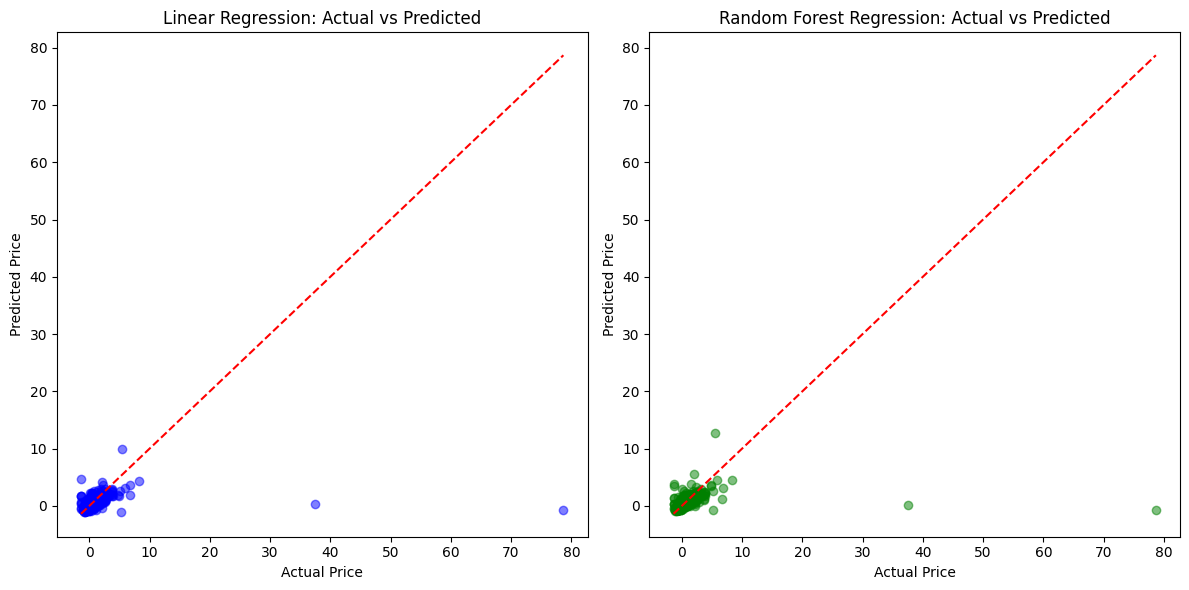

Linear Regression Metrics:
MAE: 0.6257893760429275, MSE: 8.942025991008585, RMSE: 2.990322054730658, R-squared: 0.033045043902091176

Random Forest Regression Metrics:
MAE: 0.5036498694493012, MSE: 8.855727177114993, RMSE: 2.975857385211024, R-squared: 0.04237705276492454

Based on the evaluation metrics, Random Forest Regression performs better for this dataset.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing
# Load the dataset
df = pd.read_csv('house_prices.csv')
print("DATASET: \n")
print(df)
print("\n")

#info
print(df.info())

# Handle missing values
# For numerical features, replace missing values with median
# For categorical features, replace missing values with most frequent value
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
print("NUMERICAL FEATURES: \n")
print(numeric_features)
print("\n")
print("CATEGORICAL FEATURES: \n")
print(categorical_features)
print("\n")

# Impute missing values and scale numeric features
numeric_transformer = SimpleImputer(strategy='median')
numeric_transformer.fit(df[numeric_features])
df[numeric_features] = numeric_transformer.transform(df[numeric_features])
scaler = RobustScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Impute missing values and encode categorical features
categorical_transformer = SimpleImputer(strategy='most_frequent')
categorical_transformer.fit(df[categorical_features])
df[categorical_features] = categorical_transformer.transform(df[categorical_features])
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)

# Outlier detection and handling (remove outliers using IQR)
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range: \n")
print(IQR)
print("\n")

# Define the outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("LOWER BOUND: \n")
print(lower_bound)
print("\n")
print("UPPER BOUND: \n")
print(upper_bound)
print("\n")

# Calculate skewness and kurtosis of numerical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_features].apply(lambda x: x.skew())
kurtosis = df[numeric_features].apply(lambda x: x.kurtosis())

# Create histograms for skewness and kurtosis
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(skewness, kde=True, color='skyblue')
plt.title('Skewness')
plt.xlabel('Skewness')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(kurtosis, kde=True, color='salmon')
plt.title('Kurtosis')
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Splitting data into train and test sets
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Descriptive Statistical Analysis
# Summary statistics
summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)

# Step 3: Visual Analysis
# Histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Feature Extraction based on correlation
# You can use the correlation matrix generated in Step 3 for feature extraction

# Step 5: Models Creation
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Step 6: Evaluation of the model based on various metrics
# Evaluation metrics for Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)

# Evaluation metrics for Random Forest Regression
rf_r2 = r2_score(y_test, rf_predictions)

# Store accuracy values
accuracy_dict = {
    'Linear Regression': lr_r2,
    'Random Forest Regression': rf_r2
}

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_dict.keys()), list(accuracy_dict.values()), marker='o')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.grid(True)
plt.show()

# Plotting scatter plots for both models
plt.figure(figsize=(12, 6))

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Scatter plot for Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

# Evaluate Random Forest Regression model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Step 7: Final Selection of the model
# Compare evaluation metrics
print("Linear Regression Metrics:")
print(f"MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R-squared: {lr_r2}")

print("\nRandom Forest Regression Metrics:")
print(f"MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R-squared: {rf_r2}")

# Step 8: Storytelling
# Summarize findings and decisions
print("\nBased on the evaluation metrics, Random Forest Regression performs better for this dataset.")
